# NAME SHOAIB FAROOQ

# REG# 21I-2278

# CLASS MS(DS)

# Libraries

In [55]:
#for work with numpy arrays
import numpy as np
#for work with dataframs
import pandas as pd
#for draw chats and graphs
import matplotlib.pyplot as plt
%matplotlib inline
#for controling string functions
#for representation of different data behaviours
import seaborn as sns
#for ploating
import plotly as py
import plotly.graph_objs as go
#Kmean classifier
from sklearn.cluster import KMeans
#using for Deep Copy
from copy import deepcopy

# Data Loading

In [56]:
#Load data from memory to program
Data = pd.read_csv("B:/FAST DS/S2/ML/ASSIBNMENT/A4/Mall_Customers.csv")
Data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
#check number of empty spaes
print(Data.isnull().sum())
#check for na values
print(Data.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [58]:
# Replacement of columns names
Data.rename(index=str, columns={'Annual Income (k$)': 'AnnualIncome',
                              'Spending Score (1-100)': 'Spending Score'}, inplace=True)
Data.head()

,CustomerID,Gender,Age,AnnualIncome,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Ploting

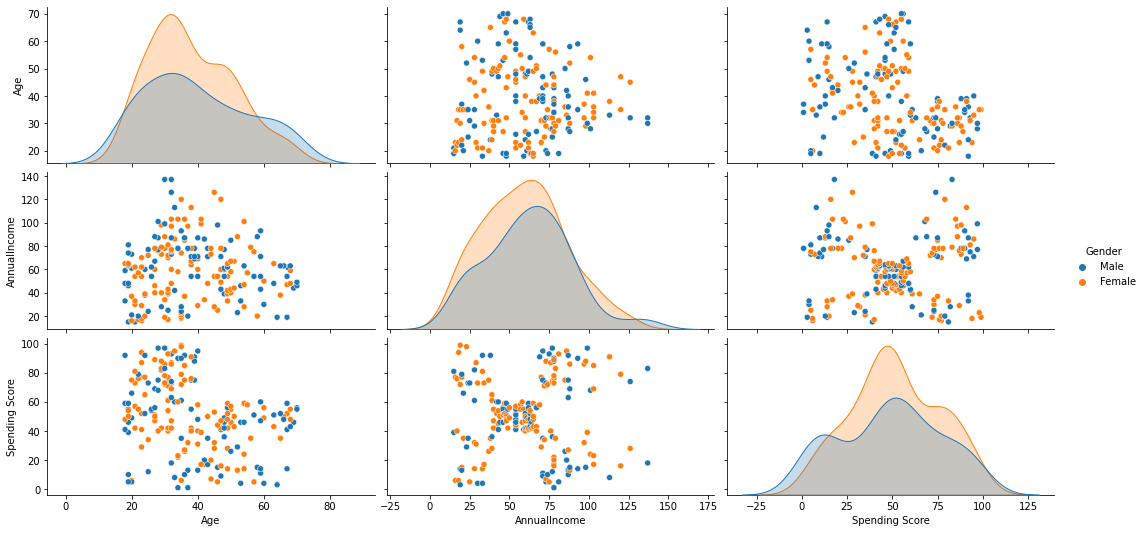

In [59]:
# Data set representation using pairplot
#Drop ID and remaning all using in ploting
sns.pairplot(Data.drop('CustomerID', axis=1), hue='Gender', aspect=2)
plt.show()

In [60]:
# From presentations shows that gender not directly relation to segmenting customers. 
#So we need to drop gender and ID

In [61]:
FilterData = Data.drop(['CustomerID', 'Gender'], axis=1)
FilterData.head()

,Age,AnnualIncome,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Data Prepration

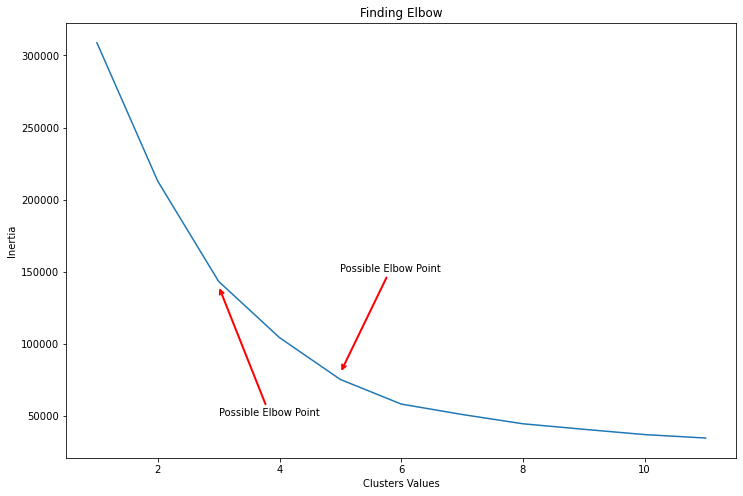

In [62]:
clusters = []

for i in range(1, 12):
    km = KMeans(n_clusters=i).fit(FilterData)
    clusters.append(km.inertia_)
clusters

#Draw Structure for finding Elbow    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 12)), y=clusters, ax=ax)
ax.set_title('Finding Elbow')
ax.set_xlabel('Clusters Values')
ax.set_ylabel('Inertia')

# For mention arrows on Plot
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))

plt.show()

In [ ]:
# Above representation shows tha approxometly we need number of cluster between 3 to 5

# CLUSTRING FROM SCRATCH

## Cluster IF K=3

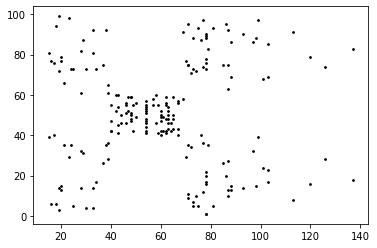

In [63]:
# Getting the values and plotting it
P1 = FilterData['AnnualIncome'].values
P2 = FilterData['Spending Score'].values
X = np.array(list(zip(P1, P2)))
plt.scatter(P1, P2, c='black', s=3)

In [64]:
#Function for Euclidean Distance Caculator
def dist(P1, P2, ax=1):
    print(np.linalg.norm(P1 - P2, axis=ax))
    return np.linalg.norm(P1 - P2, axis=ax)

In [65]:
P=Data.iloc[:,3:]
P

,AnnualIncome,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [66]:
# Number of clusters and intilization of centroid points
k = 3
#X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)

# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

Initial Centroids
[[ 65.  75.]
 [ 46.  97.]
 [ 58. 111.]]


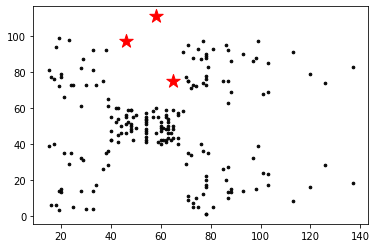

In [67]:
# Plotting along with the Centroids
plt.scatter(P1, P2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='r')

In [68]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

192.50974001333023


In [69]:
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)


[61.6116872  65.76473219 83.86298349]
[50.35871325 34.88552709 52.43090692]
[ 84.62860037  95.81753493 113.08846095]
[49.04079934 36.05551275 54.03702434]
[59.40538696 63.95310782 81.98780397]
[48.01041554 35.80502758 53.90732789]
[ 83.48652586  95.21029356 112.36102527]
[50.69516742 28.16025568 43.46262762]
[ 85.44003745  97.80081799 114.82595525]
[46.09772229 36.79673899 55.15432893]
[ 76.40026178  87.2811549  104.54664031]
[51.88448708 27.07397274 40.80441153]
[ 75.          86.02325267 103.24727599]
[45.04442252 32.80243893 50.99019514]
[ 76.6093989   87.93179175 105.10946675]
[45.17742799 31.6227766  49.67896939]
[59.46427499 66.85057965 84.52810184]
[44.91102315 39.8246155  58.25804665]
[62.28964601 71.78439942 89.1571646 ]
[47.88527958 23.02172887 37.33630941]
[57.28001397 65.78753681 83.25863319]
[41.0487515  32.55764119 50.99019514]
[ 80.62257748  94.36630755 111.01801656]
[40.04996879 31.89043744 50.32891813]
[ 71.34423593  84.92938243 101.53324579]
[37.65634077 23.43074903 4

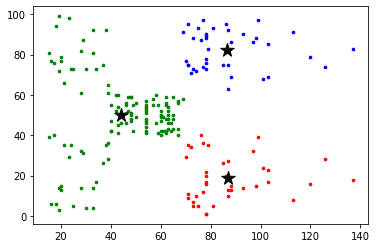

In [70]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')


## Cluster IF K=5

In [71]:
# Number of clusters and intilization of centroid points
k = 5
#X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)

# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

Initial Centroids
[[  9. 114.]
 [  7.  17.]
 [ 43.  76.]
 [ 34.  17.]
 [  1.  83.]]


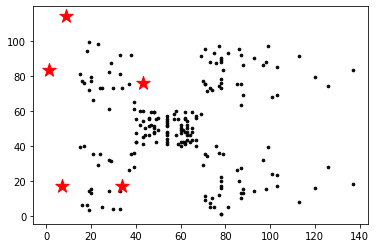

In [73]:
# Plotting along with the Centroids
plt.scatter(P1, P2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='r')

In [75]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2 3 4)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

171.3913650100261


In [76]:
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)


[75.23961722 23.40939982 46.40043103 29.06888371 46.17358552]
[33.54101966 64.49806199 28.44292531 66.76076692 14.14213562]
[108.2266141   14.2126704   75.02666193  21.09502311  78.44743463]
[37.65634077 60.67124525 27.01851217 62.64183905 16.15549442]
[74.43117626 25.07987241 44.40720662 28.60069929 45.88027899]
[38.83297568 59.8414572  26.         61.40032573 17.4642492 ]
[108.37435121  15.55634919  74.33034374  19.41648784  78.85429601]
[21.9317122  77.78174593 30.8058436  78.64477096 20.24845673]
[111.44954015  18.43908891  76.84399781  20.51828453  82.        ]
[43.17406629 56.29387178 24.33105012 57.00877125 21.09502311]
[100.49875621  12.36931688  66.48308055  15.29705854  71.30918594]
[18.02775638 82.87339742 33.24154028 83.36066219 24.08318916]
[99.60923652 13.15294644 65.19202405 14.14213562 70.60453243]
[38.60051813 61.39218191 23.02172887 61.6116872  19.92485885]
[101.59724406  13.60147051  67.06713055  14.56021978  72.53275122]
[36.68787266 63.34824386 23.19482701 63.56099

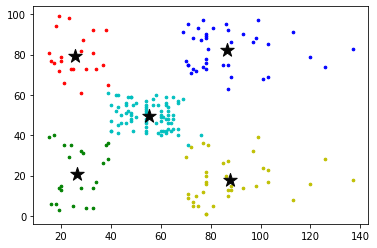

In [77]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')


# CLUSTRING USING LIBRARIES

## Cluster IF K=3

C:\Users\mshoa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


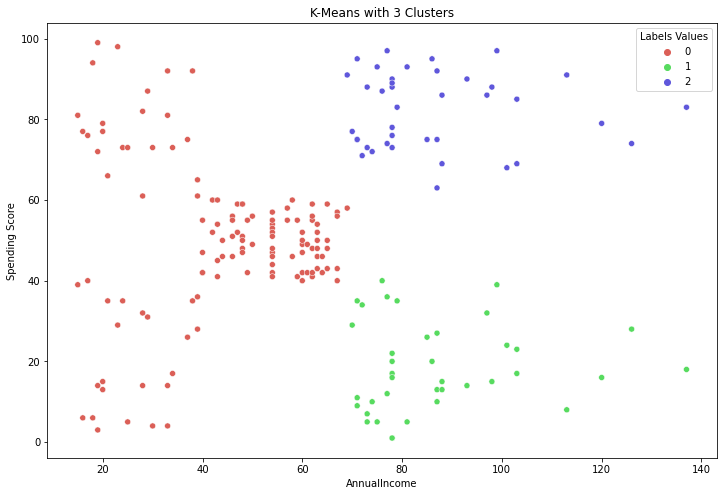

In [78]:

#number of cluster = 3
KMean_3= KMeans(n_clusters=3).fit(FilterData)
#Assign labels values 0.1.2
FilterData['Labels Values'] = KMean_3.labels_
#Ploting
plt.figure(figsize=(12, 8))

sns.scatterplot(FilterData['AnnualIncome'], FilterData['Spending Score'], hue=FilterData['Labels Values'],
                palette=sns.color_palette('hls', 3))
plt.title('K-Means with 3 Clusters')
plt.show()


## Davies-Bouldin Index

In [79]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
db_index = davies_bouldin_score(P, Y)
print(db_index*100)

71.52768202484619


## Silhouette Coefficient

Text(0, 0.5, 'Cluster label')

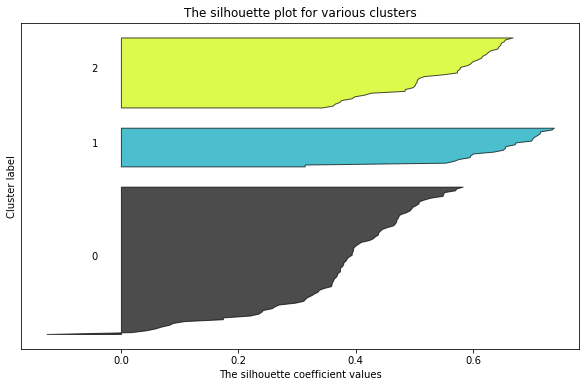

In [84]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

sample_silhouette_values = silhouette_samples(FilterData, Y)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[Y == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

## Cluster IF K=5

C:\Users\mshoa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


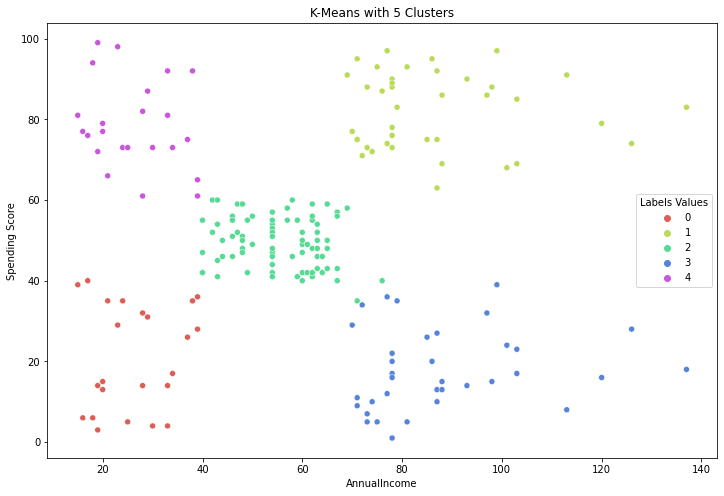

In [80]:

#number of cluster = 5
KMean_5 = KMeans(n_clusters=5).fit(FilterData)
#Assign labels values 0.1.2,4,5
FilterData['Labels Values'] = KMean_5.labels_
#Ploting
plt.figure(figsize=(12, 8))

sns.scatterplot(FilterData['AnnualIncome'], FilterData['Spending Score'], hue=FilterData['Labels Values'],
                palette=sns.color_palette('hls', 5))
plt.title('K-Means with 5 Clusters')
plt.show()

## Davies-Bouldin Index 

In [81]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
db_index = davies_bouldin_score(P, Y)
print(db_index*100)

57.256289955970864


## Silhouette Coefficient

Text(0, 0.5, 'Cluster label')

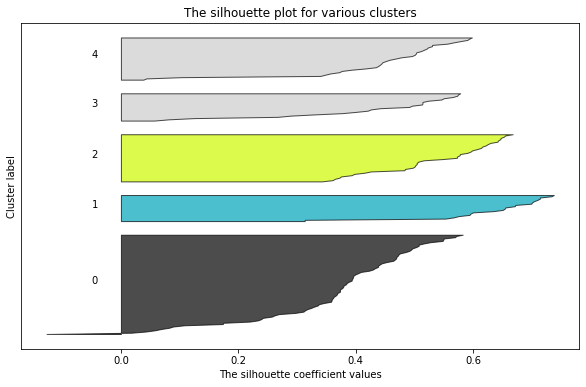

In [83]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

sample_silhouette_values = silhouette_samples(FilterData, Y)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(5):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[Y == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# DBSCAN

In [85]:
#We can now create a DBSCAN object and fit the data. We defining the eps = 0.4 and min_samples = 5

In [87]:
# extracting the above mentioned columns
Point = FilterData.loc[:, ['AnnualIncome','Spending Score']].values
Point.shape

(200, 2)

In [89]:
from sklearn.neighbors import NearestNeighbors
# creating an object of the NearestNeighbors class
neighb = NearestNeighbors(n_neighbors=2) 
# fitting the data to the object
nbrs=neighb.fit(Point) 
# finding the nearest neighbours
distances,indices=nbrs.kneighbors(X)
print(distances,indices)

[[ 0.          2.23606798]
 [ 0.          4.12310563]
 [ 0.          2.        ]
 [ 0.          1.41421356]
 [ 0.          2.23606798]
 [ 0.          1.41421356]
 [ 0.          2.        ]
 [ 0.          5.09901951]
 [ 0.          3.16227766]
 [ 0.          4.47213595]
 [ 0.          1.41421356]
 [ 0.          4.12310563]
 [ 0.          1.41421356]
 [ 0.          2.        ]
 [ 0.          1.41421356]
 [ 0.          2.        ]
 [ 0.          3.        ]
 [ 0.          6.32455532]
 [ 0.          5.83095189]
 [ 0.          4.12310563]
 [ 0.          3.        ]
 [ 0.          1.        ]
 [ 0.          5.09901951]
 [ 0.          1.        ]
 [ 0.          5.        ]
 [ 0.          5.09901951]
 [ 0.          1.41421356]
 [ 0.          8.60232527]
 [ 0.          1.41421356]
 [ 0.          5.09901951]
 [ 0.          3.        ]
 [ 0.          4.        ]
 [ 0.          3.        ]
 [ 0.          5.        ]
 [ 0.          3.16227766]
 [ 0.          5.09901951]
 [ 0.          3.16227766]
 

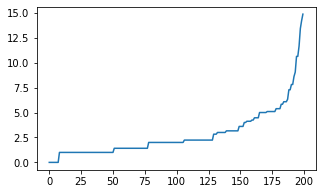

In [90]:
# Sort and plot the distances results
# sorting the distances
distances = np.sort(distances, axis = 0) 
# taking the second column of the sorted distances
distances = distances[:, 1] 
# setting the figure size
plt.rcParams['figure.figsize'] = (5,3)
# plotting the distances
plt.plot(distances) 
# showing the plot
plt.show() 

In [ ]:
#We can see from the above plot that the curve's greatest curvature is about eight, hence we chose Eps as eight.

In [92]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(X) # fitting the model
labels = dbscan.labels_ # getting the labels

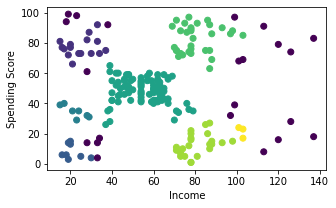

In [94]:
# Plot the clusters
plt.scatter(X[:, 0], X[:,1], c = labels, cmap= "viridis") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot